In [1]:
 ##  vert important task of ML this is known as regression   ..data preoare

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()   # object cretation 

In [13]:
X = [[0],[100]]   #input celsious 
Y = [32,212]    # forenheight               self logic understand

lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.predict([[25]])  #celsiuis to forenhight

array([77.])

In [15]:
lr.coef_    # y= mx + b     b

array([1.8])

In [16]:
lr.intercept_   #y y= 1.8x + 32  # f= 1.8c + 32    m

32.0

In [19]:
Y = [32,212] 
X = [[0],[100]]

lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.predict([[25]])

array([77.])

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 


%matplotlib inline

In [9]:
from sklearn.datasets import make_regression   #for generate some fake data 

In [31]:
X, y=make_regression(n_samples=500, n_features=1, noise=15, bias =150)  #only using one features bcs 2d other wsie 3d 
print(X.shape, y.shape)

# if you change the value of noise ....chekc it data spread
# bais set the midpoints

(500, 1) (500,)


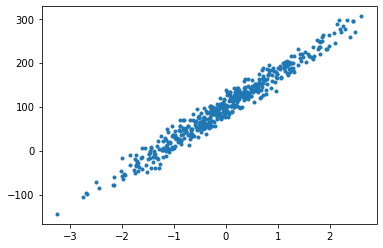

In [30]:
plt.plot(X, y, '.')  #y is a vctore or column only 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(375, 1) (375,)
(125, 1) (125,)


In [33]:
#hypothesis equation 
def hypothesis(x1, W):   #h(thita)
    x0 = 1 
    return W[0]*x0 + W[1]*x1


In [34]:
def error(X, W, y_true):  #j(thita)
    err = 0.0
    m = X.shape[0]
    for i in range(m):
        err +=(hypothesis(X[i],  W) - y_true[i])**2  #equimlet 
    err = err / (2*m)
    return err

# its not use in optamization .....  

In [35]:
# gradient descent

def gradient_descent(X, W, y_true, learning_rate = 0.1):
    m=X.shape[0]
    grad0 = 0.0 
    grad1 = 0.0

    for i in range(m):
        g = y_true[i] - hypothesis(X[i], W)
        grad0 +=  g * 1
        grad1 +=  g * X[i]
    grad0 /= m 
    grad1 /= m
    W[0] += learning_rate * grad0   # theta 0
    W[1] += learning_rate * grad1   # theta 1
    
    err = error(X, W, y_true)
    return W, err

In [36]:
# goig to hard code suppose 400 times 
W = [0.1 , 0.1]  #any two values for theta0 and theta1
error_list = []
for i in range(400):
    W, err= gradient_descent(X_train, W, y_train)
    error_list.append(err)
print(W)

[array([150.04936905]), array([58.50552084])]


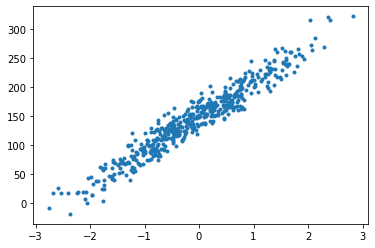

In [37]:
plt.plot(X, y, '.')
plt.show()

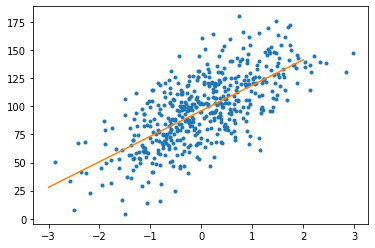

In [18]:
plt.plot(X, y, '.')
xh = np.arange(-3, 3)
yh = W[0] + W[1]*xh    # vectorization  = numpy * scaler + again scaler
plt.plot(xh, yh)
plt.show()

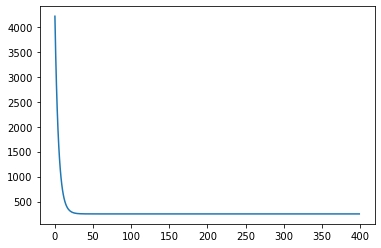

In [19]:
plt.plot(error_list)
plt.show()

In [20]:
def stochastic_gradient_descent(X, W, y_true, learning_rate= 0.1):
    m =  X.shape[0]
    error_list = []
    for i in range(m):
        g=y_true[i] -  hypothesis(X[i], W)
        grad0 = g * 1
        grad1 = g * X[i]
        W[0] += learning_rate * grad0
        W[1] += learning_rate * grad1
        
        # now theta update frequently 
        
        err =  error(X, W, y_true)
        error_list.append(err)
    return W,error_list

In [21]:
W = [0.1 , 0.1]
W, error_list = stochastic_gradient_descent(X_train, W, y_train)
print(W)

[array([91.77729396]), array([25.44186])]


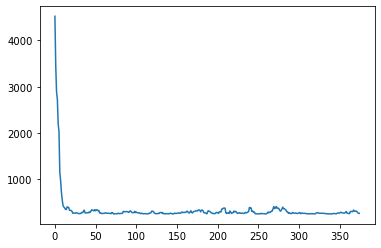

In [22]:
plt.plot(error_list)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.41217071453935905

In [24]:
lr.coef_   #theta 1 

array([22.71123855])

In [25]:
lr.intercept_   #theta 0

96.12876271997901

In [38]:
#HOme workkk....  
# Boston houses data 

In [39]:
from sklearn.datasets import load_boston 

In [40]:
dataset = load_boston()

In [41]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [42]:
print(dataset['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
X = dataset['data']
X.shape

(506, 13)

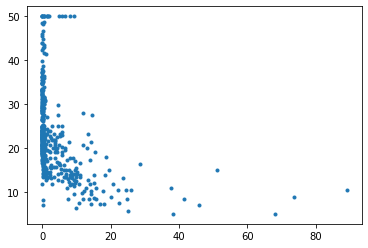

In [44]:
f=0
x = X[:,f] #all training example with i column
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

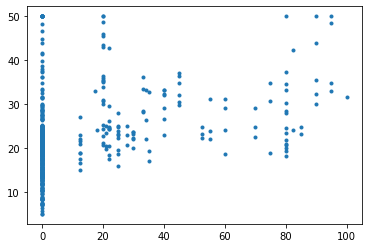

In [45]:
f = 1
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 2   # non  reatail  mmeans   indusatrial 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 3 # rivers bond 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 4   # nitric oxode inverse effect during purchase 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 5
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 6 # building age 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 7   # office or industrial area 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 8  # office or industrial area 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 9  # property tax rate 
x = X[:,f] #all training example with i column
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 10  #teacher
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f = 11  #enough black population 
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
f =12   
x = X[:,f] #all training example with i clumn
y = dataset['target']
plt.plot(x,y,'.')
plt.show()

In [ ]:
# Features weight + NOramlozation 


# Buliding Model
X = dataset['data']
y = dataset['tar']